In [2]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, Flatten
import xlrd
import math

In [3]:
# !pip install xlrd==1.2.0

In [4]:
#import excel worksheet
#1272 rows x 35 cols
df = pd.read_excel("movieData.xlsx")
print(df.shape)
# data.head()

(6083, 15)


In [5]:
#Isolate columns
# IMDb score - dependent
# Metascore  - dependent
# Genre- assign ids to different genre
# Number of genres
# Country - number of countries
# Budget 
# Runtime 
# Worldwide income
# USA income
imdbScores = df["avg_vote"]
metaScores = df["metascore"]
genres = df["genre"]
countries = df["country"]
budgets = df["budget"]
runtimes = df["duration"]
worldIncome = df["worlwide_gross_income"]
usaIncome = df["usa_gross_income"]



In [6]:
train_length = int(df.shape[0]*0.8)

test_length = df.shape[0]-train_length

print(train_length, test_length)

4866 1217


In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [153]:
#Create numCountries array
numCountries = []
# normMax = max(countries)
# normMin = min(countries)

for item in countries:
    numCountries.append([float(item.count(",")+1)])
# normMax = max(numCountries)
# normMin = min(numCountries)
# print(normMax)
# for i in range(len(numCountries)):
#     numCountries[i] = float(numCountries[i]-normMin)/float(normMax-normMin)
# print(numCountries[:50])    

numCountries = scaler.fit_transform(numCountries)
print(numCountries[:50])
print(len(numCountries))

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.07692308]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.07692308]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.07692308]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.15384615]
 [0.07692308]]
6083


In [154]:
#Create numGenres array
numGenres = []
for item in genres:
    numGenres.append([float(item.count(",")+1)])
# normMax = max(numGenres)
# print(normMax)
# for i in range(len(numGenres)):
#     numGenres[i] /= normMax
numGenres = scaler.fit_transform(numGenres)
print(numGenres[:50])
print(len(numGenres))

[[1. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [0.5]
 [1. ]
 [1. ]
 [1. ]
 [0.5]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [0. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [0.5]
 [1. ]
 [0.5]
 [0.5]
 [1. ]
 [0.5]
 [1. ]
 [1. ]
 [0. ]
 [0.5]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [0.5]
 [1. ]
 [1. ]
 [0.5]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [0. ]
 [1. ]
 [0.5]
 [0.5]
 [1. ]
 [0. ]]
6083


In [156]:
#create normalized runtimes
print(max(runtimes))
normRuntimes = []
for item in runtimes:
    normRuntimes.append([float(item)])
normRuntimes = scaler.fit_transform(normRuntimes)
print(normRuntimes[:20])

238
[[0.15168539]
 [0.15168539]
 [0.19101124]
 [0.12921348]
 [1.        ]
 [0.38764045]
 [0.23595506]
 [0.36516854]
 [0.15730337]
 [0.33146067]
 [0.23595506]
 [0.3258427 ]
 [0.61797753]
 [0.37078652]
 [0.43820225]
 [0.07865169]
 [0.15730337]
 [0.30337079]
 [0.34831461]
 [0.24157303]]


In [157]:
#create normalized budgets
print(max(budgets))
# normMax = max(budgets)
normBudgets = []
for item in budgets:
    normBudgets.append([float(item)])
normBudgets = scaler.fit_transform(normBudgets)
print(normBudgets[:20])

356000000
[[0.0041995 ]
 [0.0041995 ]
 [0.0001545 ]
 [0.00419669]
 [0.01115746]
 [0.00532311]
 [0.00778663]
 [0.00639054]
 [0.00728943]
 [0.00234477]
 [0.00265453]
 [0.13481931]
 [0.00588491]
 [0.00841304]
 [0.00391859]
 [0.00813214]
 [0.00068821]
 [0.00763748]
 [0.0041995 ]
 [0.00712313]]


In [159]:
#create normalized world income and usa income
# normMax = max(usaIncome)
# print(normMax)
normUSAIncome = []
for item in usaIncome:
    normUSAIncome.append([float(item)])
# print(normUSAIncome[:20])
normUSAIncome = scaler.fit_transform(normUSAIncome)
print(normUSAIncome)
# normMax = max(worldIncome)
# print(normMax)
normWorldIncome = []
for item in worldIncome:
    normWorldIncome.append([float(item)])
normWorldIncome = scaler.fit_transform(normWorldIncome)
print(normWorldIncome[:20])

[[2.03766111e-05]
 [1.74536788e-04]
 [1.66335325e-04]
 ...
 [6.98871428e-03]
 [8.32599905e-03]
 [1.05357371e-02]]
[[1.64103911e-05]
 [1.63554551e-04]
 [5.56866016e-05]
 [6.60967046e-02]
 [1.43810285e-01]
 [5.16988261e-05]
 [9.34374602e-03]
 [2.73112064e-02]
 [4.35670633e-02]
 [5.69737556e-04]
 [1.56360900e-03]
 [2.71709701e-02]
 [8.45540104e-03]
 [7.69175652e-05]
 [5.37361408e-05]
 [3.40004375e-02]
 [1.66963300e-05]
 [9.74065174e-05]
 [1.13339033e-05]
 [6.66268742e-04]]


In [160]:
#create normalized votes
votes = df["votes"]
normVotes = []
# votesMax = max(votes)
# print(votesMax)
for item in votes:
    normVotes.append([float(item)])
normVotes = scaler.fit_transform(normVotes)
print(normVotes[:20])

[[0.07133491]
 [0.09265468]
 [0.00266157]
 [0.07769328]
 [0.12456939]
 [0.04582904]
 [0.1606939 ]
 [0.03803873]
 [0.05595354]
 [0.17079996]
 [0.22373778]
 [0.03411418]
 [0.0246475 ]
 [0.04887064]
 [0.05157215]
 [0.06233692]
 [0.06498269]
 [0.01299978]
 [0.00137138]
 [0.09348936]]


In [174]:
#x_train -> [numGenres, numCountries, budget, runtime, wwIncome, usaIncome]
x_train = []
for i in range(train_length):
    # print(float(usaIncome[i]))
    # print(type(numGenres[i]))
    # print(type(numCountries[i]))
    # print(type(runtimes[i]))
    # print(type(budgets[i]))
    # print(type(worldIncome[i]))
    # print(type(usaIncome[i]))
    x_train.append([float(numGenres[i]), float(numCountries[i]), float(normRuntimes[i]), float(normVotes[i]), float(normBudgets[i]), float(normWorldIncome[i]), float(normUSAIncome[i])])
    # x_train.append([float(normBudgets[i]), float(normWorldIncome[i]), float(normUSAIncome[i])])

    # x_train.append([float(normRuntimes[i]), float(normVotes[i]), float(normBudgets[i])])

    

print(x_train[:15])

[[1.0, 0.0, 0.15168539325842695, 0.07133491023508709, 0.004199497183949213, 1.641039113000449e-05, 2.0376611147928017e-05], [1.0, 0.0, 0.15168539325842695, 0.0926546804579744, 0.004199497183949213, 0.00016355455118054023, 0.00017453678841483644], [1.0, 0.0, 0.19101123595505615, 0.0026615702606276304, 0.00015449655191786404, 5.568660157373074e-05, 0.0001663353252041908], [1.0, 0.0, 0.1292134831460674, 0.07769327651806049, 0.004196688155732524, 0.06609670455380855, 0.1974301992971575], [1.0, 0.0, 1.0, 0.12456938733417298, 0.01115746007668647, 0.14381028542175142, 0.2144342955340791], [0.5, 0.0, 0.38764044943820225, 0.0458290363491945, 0.005323108470624587, 5.1698826132407795e-05, 0.00015442387961174433], [1.0, 0.0, 0.23595505617977525, 0.1606938952837765, 0.007786626216660346, 0.009343746021081963, 0.02646648583945633], [1.0, 0.0, 0.36516853932584264, 0.03803873210077543, 0.006390539192966193, 0.027311206373237615, 0.08157477446002862], [1.0, 0.0, 0.15730337078651685, 0.05595353552197935

In [172]:
#x_test
x_test = []
for i in range(train_length, df.shape[0]):
        x_test.append([float(numGenres[i]), float(numCountries[i]), float(normRuntimes[i]), float(normVotes[i]), float(normBudgets[i]), float(normWorldIncome[i]), float(normUSAIncome[i])])
        # x_test.append([float(normBudgets[i]), float(normWorldIncome[i]), float(normUSAIncome[i])])

        # x_test.append([float(normRuntimes[i]), float(normVotes[i]), float(normBudgets[i]), float()])

    

print(x_test[:15])

[[0.5, 0.07692307692307693, 0.19101123595505615, 0.0030043050295559368, 0.022458180592424052, 0.0006377120240592825, 4.14268910391413e-05], [1.0, 0.0, 0.17977528089887634, 0.030772842767681996, 0.35111448194497114, 0.12397752121471961, 0.16410076171223023], [1.0, 0.0, 0.33146067415730335, 0.007286514856959797, 0.005604011292293431, 0.00048226884474083625, 8.922107270419911e-06], [1.0, 0.07692307692307693, 0.21910112359550565, 0.044531822550280195, 0.0336942934591778, 0.004316728849615472, 0.0018300366216364486], [1.0, 0.07692307692307693, 0.21910112359550565, 0.01383840999153037, 0.02386269470076827, 0.001403349182153561, 1.0304676244357183e-05], [0.0, 0.0, 0.18539325842696625, 0.0011668780417162191, 0.008413039508981868, 0.00019055683416571763, 0.0005430122385752908], [0.5, 0.0, 0.34831460674157305, 0.0032820913403518626, 0.09830194244301184, 0.0011878209460690456, 0.00018168878035028493], [1.0, 0.07692307692307693, 0.24719101123595505, 0.022377815713138457, 0.08425680135956966, 0.005

In [203]:
#y_train
y_train = []
y_trainTemp = []
for i in range(train_length):
    # y_train.append([float(imdbScores[i])/10, float(metaScores[i])/100])
    y_train.append(float(imdbScores[i]/10))
# y_trainTemp = scaler.fit_transform(y_trainTemp)
# for item in y_trainTemp:
#     y_train.append(item[0])
# y_train
print(y_train[:15])


[0.85, 0.85, 0.77, 0.76, 0.8099999999999999, 0.8099999999999999, 0.8, 0.78, 0.74, 0.8300000000000001, 0.85, 0.64, 0.8, 0.82, 0.82]


In [202]:
#y_test
y_test = []
y_testTemp = []
for i in range(train_length, df.shape[0]):
    y_test.append(float(imdbScores[i]/10))
    # y_testTemp.append([float(imdbScores[i])])
# y_testTemp = scaler.fit_transform(y_testTemp)
# print(y_testTemp.shape)
# print(y_testTemp[:15])
# print(type(y_testTemp))
# for item in y_testTemp:
    # y_test.append(item[0])
    # y_test.insert(i, y_test[i][0])
print(y_test[:15])

# y_test
# len(y_test)

[0.43, 0.65, 0.6599999999999999, 0.6799999999999999, 0.61, 0.36, 0.6, 0.55, 0.5900000000000001, 0.73, 0.64, 0.5700000000000001, 0.72, 0.5700000000000001, 0.45999999999999996]


In [219]:
def simpleModel(): 
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(7, activation='selu'))
    model.add(Dropout(0.2))


    # model.add(Dense(25, activation='sigmoid'))

    model.add(Dense(50, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dropout(0.2))


    # model.add(Dense(128, activation='sigmoid'))

    # model.add(Dense(128, activation='sigmoid'))

    # model.add(Dense(25, activation='sigmoid'))

    # model.add(Dense(2, activation='relu'))
    # model.add(Dense(2, activation='softmax'))
    model.add(Dense(1))

    # model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
    # opt = keras.optimizers.Adam(learning_rate=0.001)
    # model.compile(loss='mean_absolute_error', optimizer='adam')

    model.fit(x_train, y_train, epochs=100, batch_size=50, validation_data=(x_test, y_test))

    return model


In [220]:
model = simpleModel()

score = model.evaluate(x_test, y_test, verbose=0)

print(score)
# print("Test loss: " + str(score[0]))
# print("Test accuracy" + str(score[1]))

Epoch 1/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0501 - val_loss: 0.0082
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0250 - val_loss: 0.0039
Epoch 3/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.0034
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0034
Epoch 5/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0035
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0034
Epoch 7/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0034
Epoch 8/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0034
Epoch 9/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0034
Epoch 10/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.0036
Epoch 11/

In [102]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 4)                 20        
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_94 (Dense)             (None, 128)               640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 129       
Total params: 789
Trainable params: 789
Non-trainable params: 0
_________________________________________________________________


In [221]:
prediction = model.predict(np.array(x_train))
# len(prediction), len(y_test)

for i in range(75):
    print(str(prediction[i]) + " vs " + str(y_train[i]))

# print(prediction[:50])

[0.7228449] vs 0.85
[0.7474854] vs 0.85
[0.5926159] vs 0.77
[0.7009196] vs 0.76
[0.8018044] vs 0.8099999999999999
[0.7563454] vs 0.8099999999999999
[0.79073447] vs 0.8
[0.73232776] vs 0.78
[0.68252295] vs 0.74
[0.8065397] vs 0.8300000000000001
[0.8089403] vs 0.85
[0.63332367] vs 0.64
[0.76704806] vs 0.8
[0.7504134] vs 0.82
[0.77444935] vs 0.82
[0.65679556] vs 0.73
[0.7171681] vs 0.82
[0.679528] vs 0.72
[0.6794273] vs 0.7
[0.76252055] vs 0.8300000000000001
[0.70232844] vs 0.76
[0.56842196] vs 0.75
[0.64471436] vs 0.73
[0.7002084] vs 0.77
[0.74941975] vs 0.82
[0.6245758] vs 0.76
[0.8076116] vs 0.8400000000000001
[0.7415686] vs 0.76
[0.6365486] vs 0.73
[0.7224088] vs 0.77
[0.7810973] vs 0.76
[0.7865106] vs 0.8099999999999999
[0.69258404] vs 0.8
[0.79775697] vs 0.8300000000000001
[0.79695845] vs 0.8099999999999999
[0.64998025] vs 0.72
[0.58117586] vs 0.72
[0.8153866] vs 0.85
[0.786731] vs 0.79
[0.6879813] vs 0.72
[0.6614363] vs 0.72
[0.5817753] vs 0.75
[0.7619611] vs 0.75
[0.7456579] vs 0.

In [222]:
import matplotlib.pyplot as plt


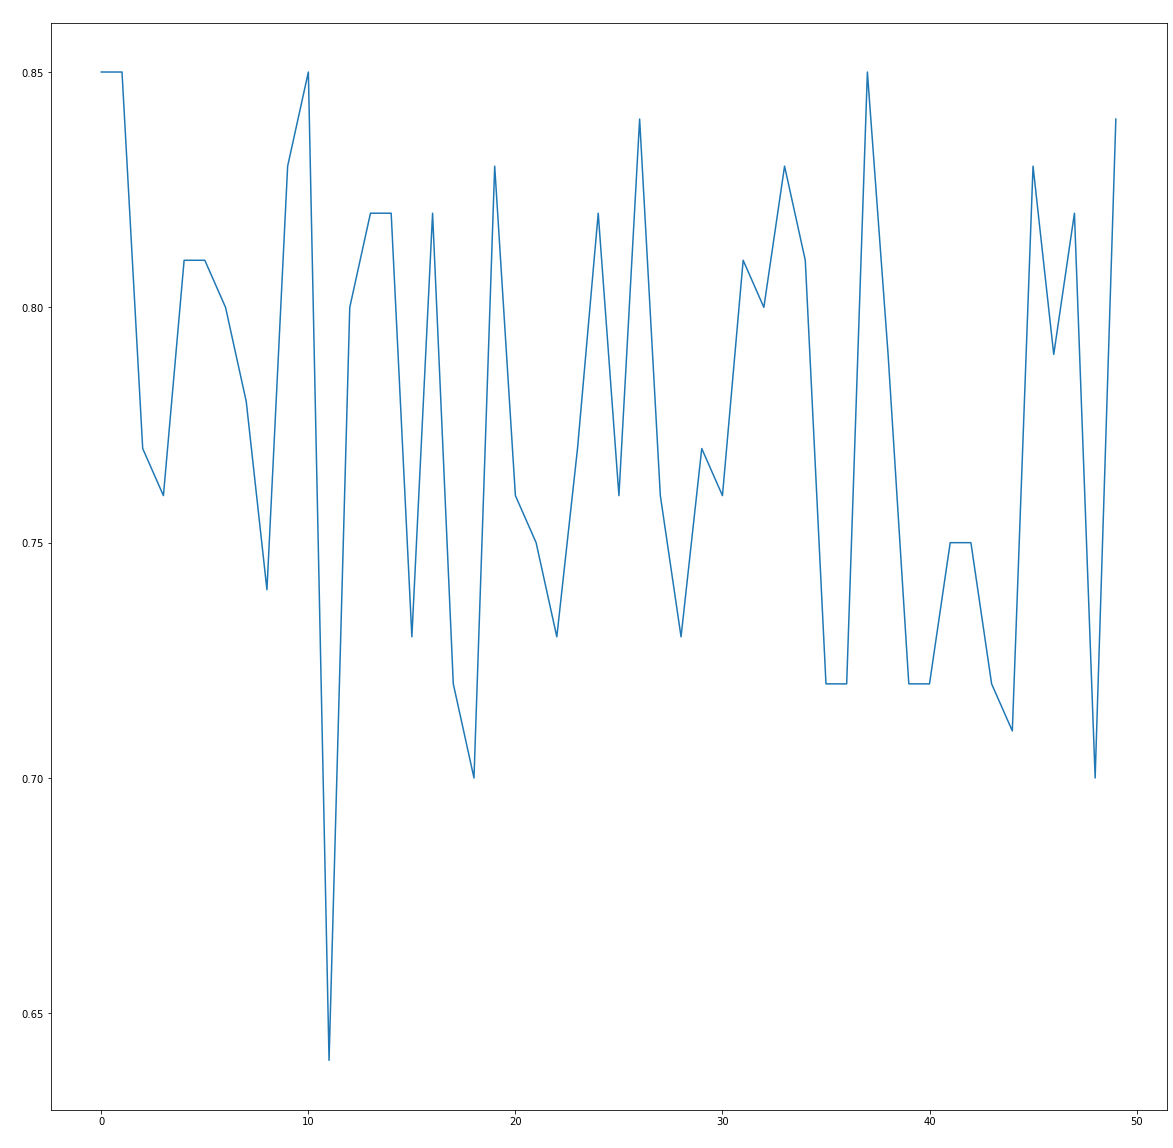

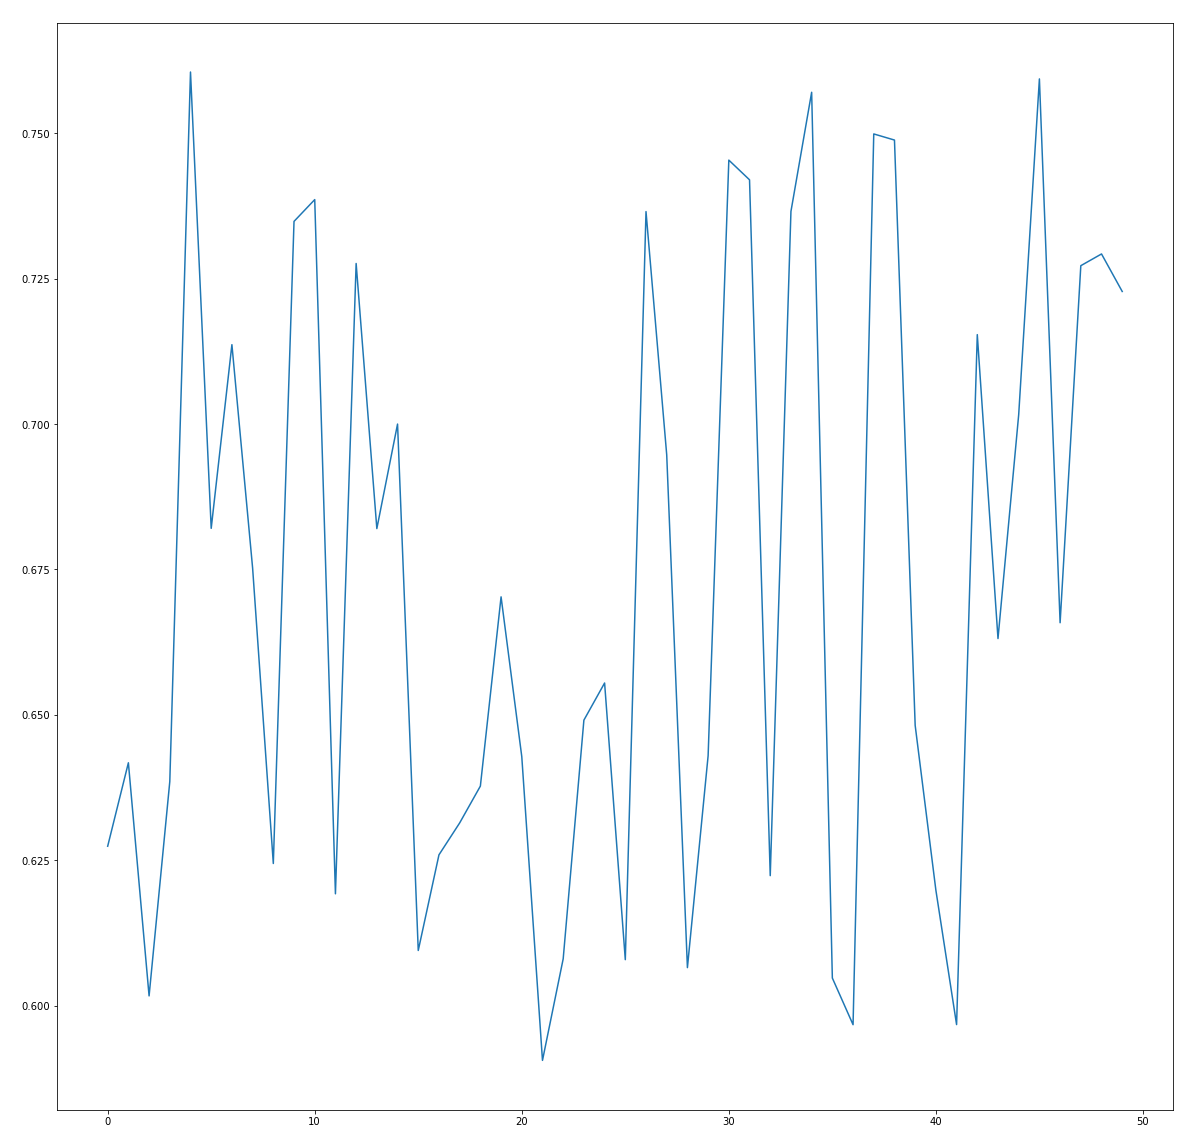

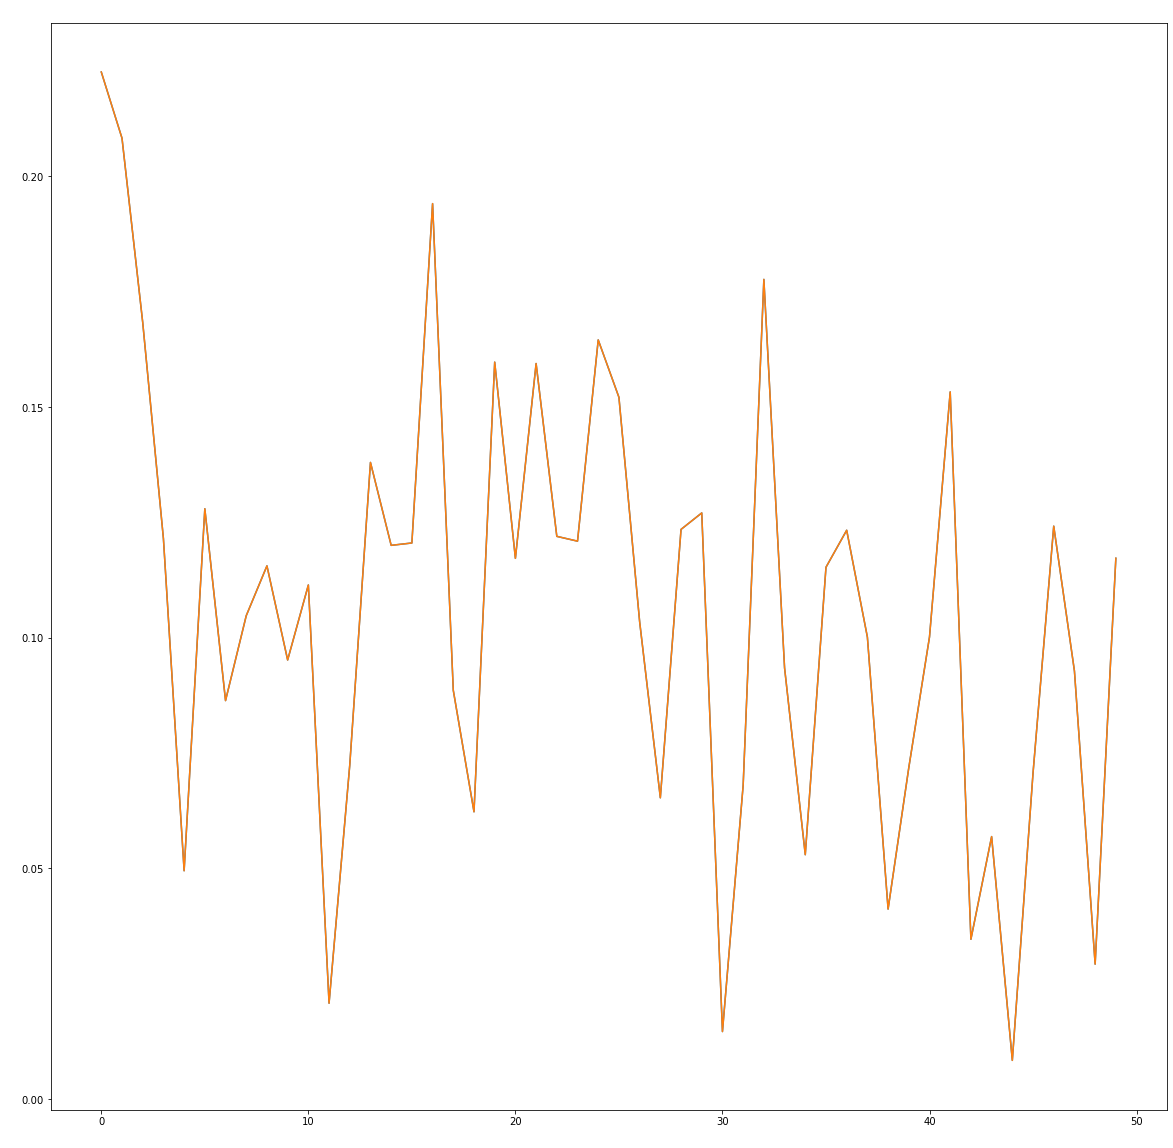

In [211]:
import matplotlib.pyplot as plt

movieNums = []
for i in range(50):
    movieNums.append(i)
plt.figure(figsize=(20,20))

plt.title('Prediction vs Actual', c='white')
plt.xlabel('Movie number', c='white')
plt.ylabel('IMDB Score', c='white')
plt.xaxis.label.set_color('red')
plt.plot(movieNums, y_train[:50])

plt.show()

plt.figure(figsize=(20,20))
plt.title('Prediction vs Actual', c='white')
plt.xlabel('Movie number', c='white')
plt.ylabel('IMDB Score', c='white')
plt.plot(movieNums, prediction[:50])

plt.show()

error = []
for i in range(len(y_train)):
    error.append([abs(prediction[i][0]-y_train[i]), abs(prediction[i][0]-y_train[i])])

plt.figure(figsize=(20,20))
plt.title('Error', c='white')
plt.xlabel('Movie number', c='white')
plt.ylabel('Score Error', c='white')
plt.plot(movieNums, error[:50])

plt.show()

In [23]:
# y_test

In [24]:
print(predictionAccuracy(prediction))

(0.9835661462612982, 0.8693508627773213)


predictionAccuracy() takes in the model's prediction based on x_test as input and outputs a tuple of (ELA Proficiency Accuracy, Math Proficiency Prediction Accuracy) at an error threshold of 0.25

In [25]:
from tabulate import tabulate

table = [['Actual ELA Proficiency', 'Predicted ELA Proficiency', 'Actual Math Proficiency', 'Predicted Math Proficiency']]

for i in range(len(prediction)):
    table.append([y_test[i][0], prediction[i][0], y_test[i][1], prediction[i][1]])

print(tabulate(table, headers='firstrow', tablefmt='grid'))

+--------------------------+-----------------------------+---------------------------+------------------------------+
|   Actual ELA Proficiency |   Predicted ELA Proficiency |   Actual Math Proficiency |   Predicted Math Proficiency |
+==========================+=============================+===========================+==============================+
|                     0.43 |                    0.611593 |                      0.19 |                     0.496093 |
+--------------------------+-----------------------------+---------------------------+------------------------------+
|                     0.65 |                    0.634955 |                      0.55 |                     0.548808 |
+--------------------------+-----------------------------+---------------------------+------------------------------+
|                     0.66 |                    0.699084 |                      0.66 |                     0.644346 |
+--------------------------+----------------------------

==============================================================================================================================================================================================================

In [26]:
#Community ties vs ELA and Math proficiencies
familyCommunity = df["Strong Family-Community Ties %"]

removedNaN = [x for x in familyCommunity if math.isnan(x) == False]
avgFamComm = sum(removedNaN)/1272
avgFamComm

KeyError: 'Strong Family-Community Ties %'

In [ ]:
def setXtrainTest(key):
    x_train = []
    x_test = []

    if key == 0:
        for i in range(train_length):
            x_train.append(econIndices[i] if not math.isnan(econIndices[i]) else avgEcon)


        for i in range(train_length, 1272):
            x_test.append(econIndices[i] if not math.isnan(econIndices[i]) else avgEcon)
    
    elif key == 1:
        for i in range(train_length):
            x_train.append(attendRate[i] if not math.isnan(attendRate[i]) else avgAttendRate)


        for i in range(train_length, 1272):
            x_test.append(attendRate[i] if not math.isnan(attendRate[i]) else avgAttendRate)

    elif key == 2:
        for i in range(train_length):
            x_train.append(percentChronAbsent[i] if not math.isnan(percentChronAbsent[i]) else avgPercentChronAbs)


        for i in range(train_length, 1272):
            x_test.append(percentChronAbsent[i] if not math.isnan(percentChronAbsent[i]) else avgPercentChronAbs)

    elif key == 3:
        for i in range(train_length):
            x_train.append(supportEnv[i] if not math.isnan(supportEnv[i]) else avgSuppEnv)


        for i in range(train_length, 1272):
            x_test.append(supportEnv[i] if not math.isnan(supportEnv[i]) else avgSuppEnv)

    elif key == 4:
        for i in range(train_length):
            x_train.append(familyCommunity[i] if not math.isnan(familyCommunity[i]) else avgFamComm)


        for i in range(train_length, 1272):
            x_test.append(familyCommunity[i] if not math.isnan(familyCommunity[i]) else avgFamComm)
    
    return x_train, x_test


# len(x_test)


Key table:
0   econIndices
1   attendRate
2   percentChronAbsent
3   supportEnv
4   familyCommunity

In [ ]:
x_train, x_test = setXtrainTest(0)

If you run all the keys through setXtrainTest(key), you will see that Economic Need Index is the most influential factor in ELA and Math proficiency prediction, meaning ENI has the largest say in what distribution these proficiences can take on.

In [ ]:
model = simpleModel()

score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/50
21/21 [==============================] - 0s 720us/step - loss: 5.8809
Epoch 2/50
21/21 [==============================] - 0s 735us/step - loss: 4.4357
Epoch 3/50
21/21 [==============================] - 0s 760us/step - loss: 2.7743
Epoch 4/50
21/21 [==============================] - 0s 904us/step - loss: 1.4170
Epoch 5/50
21/21 [==============================] - 0s 1ms/step - loss: 0.8332
Epoch 6/50
21/21 [==============================] - 0s 1ms/step - loss: 0.7459
Epoch 7/50
21/21 [==============================] - 0s 1ms/step - loss: 0.7256
Epoch 8/50
21/21 [==============================] - 0s 1ms/step - loss: 0.7038
Epoch 9/50
21/21 [==============================] - 0s 1ms/step - loss: 0.6835
Epoch 10/50
21/21 [==============================] - 0s 1ms/step - loss: 0.6636
Epoch 11/50
21/21 [==============================] - 0s 999us/step - loss: 0.6420
Epoch 12/50
21/21 [==============================] - 0s 902us/step - loss: 0.6215
Epoch 13/50
21/21 [==================

In [ ]:
prediction = model.predict(x_test)

In [ ]:
print(predictionAccuracy(prediction))

(0.7529411764705882, 0.5843137254901961)


In [ ]:
table = [['Actual ELA Proficiency', 'Predicted ELA Proficiency', 'Actual Math Proficiency', 'Predicted Math Proficiency']]

for i in range(len(prediction)):
    table.append([y_test[i][0], prediction[i][0], y_test[i][1], prediction[i][1]])

print(tabulate(table, headers='firstrow', tablefmt='grid'))

+--------------------------+-----------------------------+---------------------------+------------------------------+
|   Actual ELA Proficiency |   Predicted ELA Proficiency |   Actual Math Proficiency |   Predicted Math Proficiency |
+==========================+=============================+===========================+==============================+
|                  2.89    |                     2.76364 |                   3.27    |                      2.91436 |
+--------------------------+-----------------------------+---------------------------+------------------------------+
|                  2.28    |                     2.38293 |                   2.44    |                      2.47627 |
+--------------------------+-----------------------------+---------------------------+------------------------------+
|                  2.75    |                     2.49758 |                   3.04    |                      2.6082  |
+--------------------------+----------------------------